In [1]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Файл {filename} успешно загружен. Размер файла: {len(uploaded[filename])} байт.')

Saving Aptamer_vs_DNA_Final.csv to Aptamer_vs_DNA_Final.csv
Файл Aptamer_vs_DNA_Final.csv успешно загружен. Размер файла: 712736 байт.


In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Файл {filename} успешно загружен. Размер файла: {len(uploaded[filename])} байт.')

Saving data_aptamers.xlsx to data_aptamers.xlsx
Файл data_aptamers.xlsx успешно загружен. Размер файла: 56978 байт.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df = pd.read_csv('Aptamer_vs_DNA_Final.csv')
ap_df = pd.read_excel('data_aptamers.xlsx')
df.head()

,Seq,Seq Type,Seq Len,A_percent,C_percent,G_percent,T_percent,A_T ratio,C_G ratio,Purine,Pyrimidine
0,TTGGCGAA,DNA,8,25.000000,12.500000,37.500000,25.000000,0.500000,0.500000,0.625000,0.375000
1,ATGGCTAGCGAAGCTAGA,DNA,18,33.333333,16.666667,33.333333,16.666667,0.500000,0.500000,0.666667,0.333333
2,CAAATGCTCCTAACCGACGTTT,DNA,22,27.272727,31.818182,13.636364,27.272727,0.545455,0.454545,0.409091,0.590909
3,GAGACCGGTAGC,DNA,12,25.000000,25.000000,41.666667,8.333333,0.333333,0.666667,0.666667,0.333333
4,CTTGTTGTTGTTCTCTGGTTCA,DNA,22,4.545455,18.181818,22.727273,54.545455,0.590909,0.409091,0.272727,0.727273


In [57]:
ap_df.head()

,aptamer_sequence,RNA/DNA,aptamer_length,molecular_target_name,molecular_target_smiles,Kd_value,pH,buffer_conditions
0,ATTTAAGCATGAAATTTGCA,NaN,NaN,L-Tyrosinamide,C1=CC(=CC=C1CC(C(=O)N)N)O,45,7.5,"20 mM Tris, 300 mM NaCl, 5 mM MgCl2"
1,ATTTAAGCATXAAATTFGCA,NaN,NaN,cocaine,CN1C2CCC1C(C(C2)OC(=O)C3=CC=CC=C3)C(=O)OC,10,7.5,"20 mM Tris, 300 mM NaCl, 5 mM MgCl2"
2,CCTGGGGGAGTATTGCGGAGGAAGG,DNA,25.0,ATP (Adenisine Triphosphate),Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,1.59 × 10^-7,7.4,"140 mM NaCl, 5 mM MgCl2"
3,AAAGCGGGCGGTTGTATAGCGGAA,DNA,24.0,AMP (Adenosine Monophosphate),Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,6.33 × 10^-10,7.4,"140 mM NaCl, 5 mM MgCl2"
4,GTCTCTGTGTGCGCCAGAGAACACTGGGGCAGATATGGGCCAGCAC...,DNA,58.0,Dopamine DA,NCCc1ccc(O)c(O)c1,4.00 × 10^-8,7.4,"140 mM NaCl, 5 mM MgCl2"


In [58]:
column_name = 'Seq Type'
unique_values = df[column_name].unique()

# Вывод уникальных значений
print(unique_values)

['DNA' 'Aptamer']


In [59]:
columns_mapping = {'A_T ratio': 'A_T_ratio', 'C_G ratio': 'C_G_ratio'}

# Используем метод rename для переименования столбцов в датафрейме df
df.rename(columns=columns_mapping, inplace=True)

In [60]:
df.shape

(5123, 11)

In [61]:
df.head()

,Seq,Seq Type,Seq Len,A_percent,C_percent,G_percent,T_percent,A_T_ratio,C_G_ratio,Purine,Pyrimidine
0,TTGGCGAA,DNA,8,25.000000,12.500000,37.500000,25.000000,0.500000,0.500000,0.625000,0.375000
1,ATGGCTAGCGAAGCTAGA,DNA,18,33.333333,16.666667,33.333333,16.666667,0.500000,0.500000,0.666667,0.333333
2,CAAATGCTCCTAACCGACGTTT,DNA,22,27.272727,31.818182,13.636364,27.272727,0.545455,0.454545,0.409091,0.590909
3,GAGACCGGTAGC,DNA,12,25.000000,25.000000,41.666667,8.333333,0.333333,0.666667,0.666667,0.333333
4,CTTGTTGTTGTTCTCTGGTTCA,DNA,22,4.545455,18.181818,22.727273,54.545455,0.590909,0.409091,0.272727,0.727273


In [62]:
df = df[df['Seq Type'] != 'Aptamer']
column_name = 'Seq Type'
unique_values = df[column_name].unique()
df.shape

(4885, 11)

In [63]:
max_length_index = df['Seq'].apply(len).idxmax()

# Находим индекс самой короткой последовательности
min_length_index = df['Seq'].apply(len).idxmin()

# Выводим самую длинную и самую короткую последовательности и их длины
print("Самая длинная последовательность:")
print(df.loc[max_length_index, 'Seq'])
print("Длина:", len(df.loc[max_length_index, 'Seq']))

print("\nСамая короткая последовательность:")
print(df.loc[min_length_index, 'Seq'])
print("Длина:", len(df.loc[min_length_index, 'Seq']))

Самая длинная последовательность:
TTGAAGGGCTTAAAATAGGTGTGAC
Длина: 25

Самая короткая последовательность:
CGTA
Длина: 4


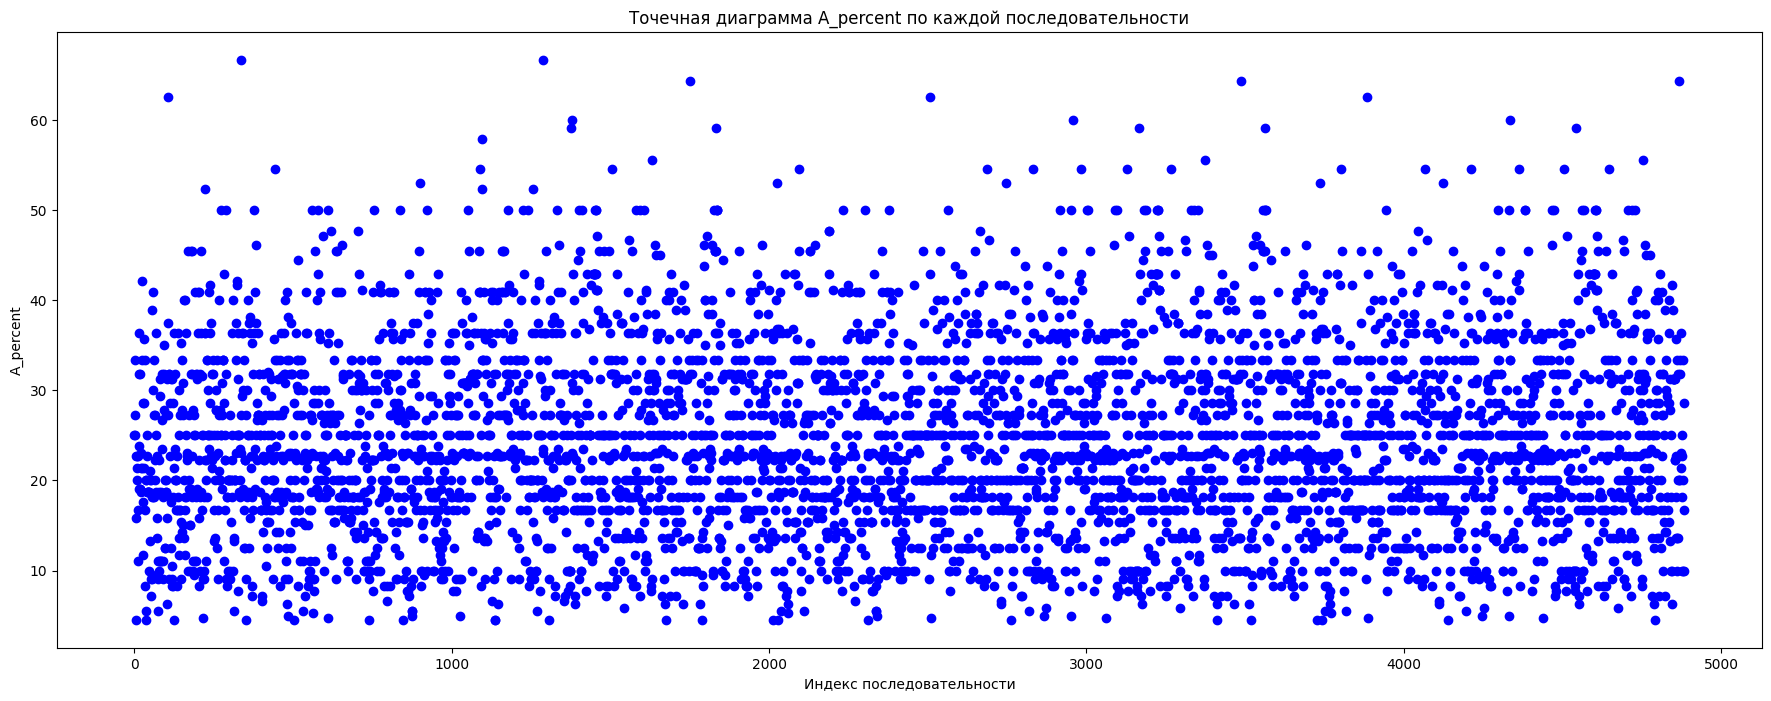

In [64]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(22, 8), sharex=True)


# Замените 'your_dataset' на ваш датасет и 'A_percent' на название колонки
plt.scatter(range(len(df)), df['A_percent'], c='blue')

plt.xlabel('Индекс последовательности')
plt.ylabel('A_percent')
plt.title('Точечная диаграмма A_percent по каждой последовательности')

plt.show()

In [65]:
dna_data = ap_df[ap_df['RNA/DNA'] == 'DNA']



# Define the calculate_metrics function
def calculate_metrics(sequence):
    A_count = sequence.count('A')
    C_count = sequence.count('C')
    G_count = sequence.count('G')
    T_count = sequence.count('T')

    total_length = len(sequence)

    A_percent = (A_count / total_length) * 100
    C_percent = (C_count / total_length) * 100
    G_percent = (G_count / total_length) * 100
    T_percent = (T_count / total_length) * 100

    A_T_ratio = A_count / T_count if T_count != 0 else 0
    C_G_ratio = C_count / G_count if G_count != 0 else 0

    Purine = (A_count + G_count) / total_length * 100
    Pyrimidine = (C_count + T_count) / total_length * 100

    return [A_percent, C_percent, G_percent, T_percent, A_T_ratio, C_G_ratio, Purine, Pyrimidine]

# Assuming 'aptamer_sequence' is a column in your DataFrame
metrics_df = pd.DataFrame(dna_data['aptamer_sequence'].apply(calculate_metrics).tolist(), columns=['A_percent', 'C_percent', 'G_percent', 'T_percent', 'A_T_ratio', 'C_G_ratio', 'Purine', 'Pyrimidine'], index=dna_data.index)

# Add the calculated metrics to the original DataFrame
dna_data = pd.concat([dna_data, metrics_df], axis=1)

# Normalize Purine and Pyrimidine by dividing by 100
dna_data[['Purine', 'Pyrimidine']] = dna_data[['Purine', 'Pyrimidine']] / 100

# Display the updated DataFrame
display(dna_data)

,aptamer_sequence,RNA/DNA,aptamer_length,molecular_target_name,molecular_target_smiles,Kd_value,pH,buffer_conditions,A_percent,C_percent,G_percent,T_percent,A_T_ratio,C_G_ratio,Purine,Pyrimidine
2,CCTGGGGGAGTATTGCGGAGGAAGG,DNA,25.0,ATP (Adenisine Triphosphate),Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,1.59 × 10^-7,7.4,"140 mM NaCl, 5 mM MgCl2",20.000000,12.000000,52.000000,16.000000,1.250000,0.230769,0.720000,0.280000
3,AAAGCGGGCGGTTGTATAGCGGAA,DNA,24.0,AMP (Adenosine Monophosphate),Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,6.33 × 10^-10,7.4,"140 mM NaCl, 5 mM MgCl2",29.166667,12.500000,41.666667,16.666667,1.750000,0.300000,0.708333,0.291667
4,GTCTCTGTGTGCGCCAGAGAACACTGGGGCAGATATGGGCCAGCAC...,DNA,58.0,Dopamine DA,NCCc1ccc(O)c(O)c1,4.00 × 10^-8,7.4,"140 mM NaCl, 5 mM MgCl2",24.137931,25.862069,34.482759,15.517241,1.555556,0.750000,0.586207,0.413793
5,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,DNA,54.0,Thiamethoxam,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,54.63,7.4,"20 mM Tris-HCl, 300 mMNaCl, 10 mM MgCl2, 150 m...",24.074074,25.925926,33.333333,16.666667,1.444444,0.777778,0.574074,0.425926
6,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,DNA,86.0,Steroid testosterone,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,10.7,7.5,"20 mM Tris, 100 nM NaCl, 2 mM MgCl2",30.232558,19.767442,20.930233,29.069767,1.040000,0.944444,0.511628,0.488372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,CGTACGGAATTCGCTAGCGGGCGGACGCTAGGTGGTGATGCTGTGC...,DNA,76.0,Palladium ion,[Pd+2],4600,8.0,HEPES (0.1 M) at pH 8.02,15.789474,23.684211,36.842105,23.684211,0.666667,0.642857,0.526316,0.473684
709,GGGAGGACGAAGCGGAACTTAGTGCGCTTGAGGCTCGATCAGGAGA...,DNA,97.0,Penicillin G,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)CC3=CC...,NaN,7.0,Phosphate buffer 0.1 M pH 7 containing 5 mM of...,25.773196,23.711340,35.051546,15.463918,1.666667,0.676471,0.608247,0.391753
710,CGACCAGCTCATTCCTCACCACGAGAAAGGAGCTCGATGAACTGCG...,DNA,93.0,Furaneol,CC1C(=O)C(=C(O1)C)O,1.1,7.6,"100 mM NaCl, 20 mM Tris-HCl [pH 7.6], 2 mM MgC...",24.731183,29.032258,27.956989,18.279570,1.352941,1.038462,0.526882,0.473118
711,ACCGTCTGAGCGATTCGTACTTTATTCGGGAAGGGTATCAGCGGGG,DNA,46.0,Atrazine,CCNC1=NC(=NC(=N1)Cl)NC(C)C,3.7,7.4,"100 mM NaCl, 20 mM Tris-HCl, and 5 mM MgCl2, p...",19.565217,19.565217,34.782609,26.086957,0.750000,0.562500,0.543478,0.456522


<ipython-input-66-fa5794c98eed>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dna_data, x=metric, fill=True, palette="magma", label='Aptamer')
<ipython-input-66-fa5794c98eed>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=metric, fill=True, palette="red", label='DNA')


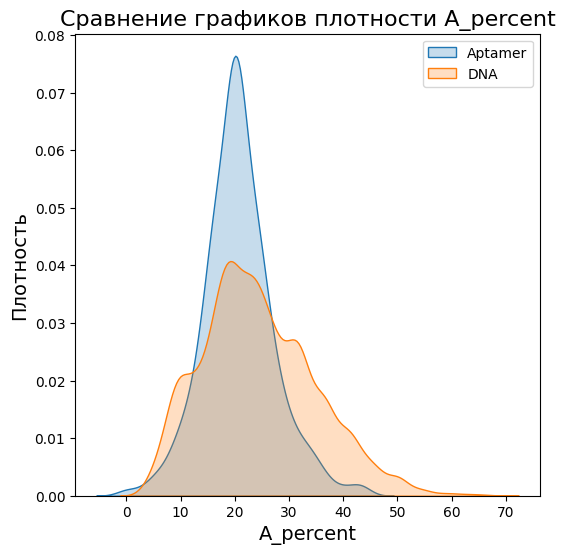

<ipython-input-66-fa5794c98eed>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dna_data, x=metric, fill=True, palette="magma", label='Aptamer')
<ipython-input-66-fa5794c98eed>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=metric, fill=True, palette="red", label='DNA')


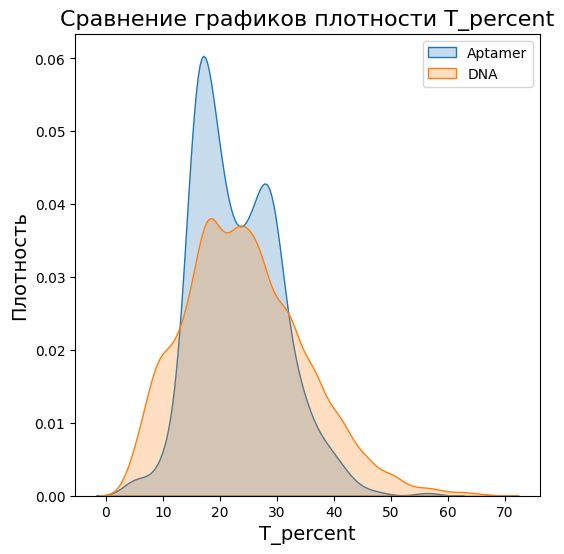

<ipython-input-66-fa5794c98eed>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dna_data, x=metric, fill=True, palette="magma", label='Aptamer')
<ipython-input-66-fa5794c98eed>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=metric, fill=True, palette="red", label='DNA')


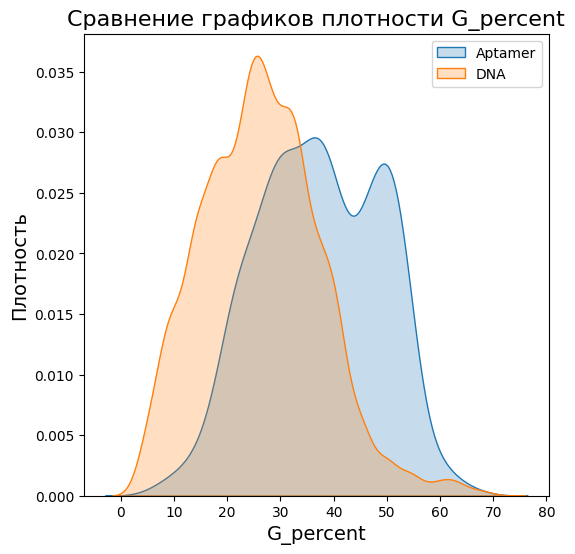

<ipython-input-66-fa5794c98eed>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dna_data, x=metric, fill=True, palette="magma", label='Aptamer')
<ipython-input-66-fa5794c98eed>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=metric, fill=True, palette="red", label='DNA')


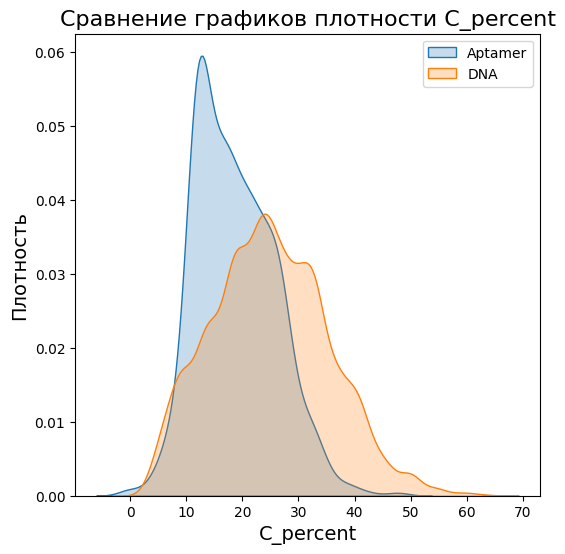

In [66]:
metrics_to_plot = ['A_percent', 'T_percent', 'G_percent', 'C_percent']

for metric in metrics_to_plot:
    plt.figure(figsize=(6, 6))

    # График плотности для metric в dna_data
    sns.kdeplot(data=dna_data, x=metric, fill=True, palette="magma", label='Aptamer')

    # График плотности для metric в df
    sns.kdeplot(data=df, x=metric, fill=True, palette="red", label='DNA')

    # Настройки подписей и заголовка
    plt.title(f'Сравнение графиков плотности {metric}', fontsize=16)
    plt.xlabel(metric, fontsize=14)
    plt.ylabel('Плотность', fontsize=14)

    # Добавляем легенду
    plt.legend()

    # Отображаем график
    plt.show()

это графики плотности аптамеров и днк для процентного содержания нуклеотидов в последовательностях:  аптамеры демонстрируют лептокуртическое распределение, тогда как особенности ДНК имеют гауссово распределение.


In [67]:
print("Columns in dna_data:", dna_data.columns)
print("Columns in df:", df.columns)

Columns in dna_data: Index(['aptamer_sequence', 'RNA/DNA', 'aptamer_length',
       'molecular_target_name', 'molecular_target_smiles', 'Kd_value', 'pH',
       'buffer_conditions', 'A_percent', 'C_percent', 'G_percent', 'T_percent',
       'A_T_ratio', 'C_G_ratio', 'Purine', 'Pyrimidine'],
      dtype='object')
Columns in df: Index(['Seq', 'Seq Type', 'Seq Len', 'A_percent', 'C_percent', 'G_percent',
       'T_percent', 'A_T_ratio', 'C_G_ratio', 'Purine', 'Pyrimidine'],
      dtype='object')


<ipython-input-68-43a5ccf1d61b>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dna_data, x=metric, fill=True, palette="plasma", label="Aptamer")
<ipython-input-68-43a5ccf1d61b>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=metric, fill=True, palette="plasma", label="DNA")


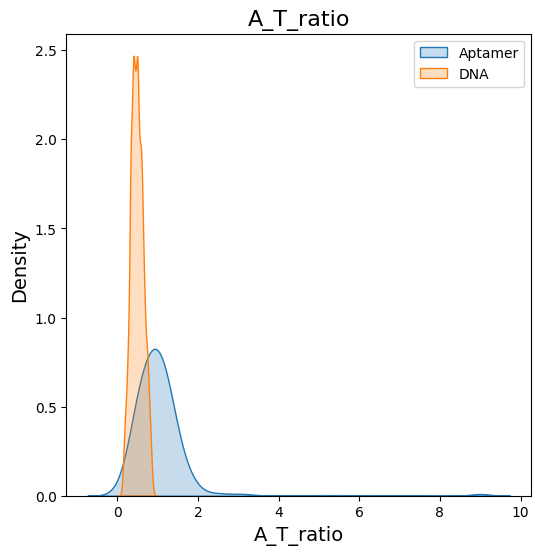

<ipython-input-68-43a5ccf1d61b>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dna_data, x=metric, fill=True, palette="plasma", label="Aptamer")
<ipython-input-68-43a5ccf1d61b>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=metric, fill=True, palette="plasma", label="DNA")


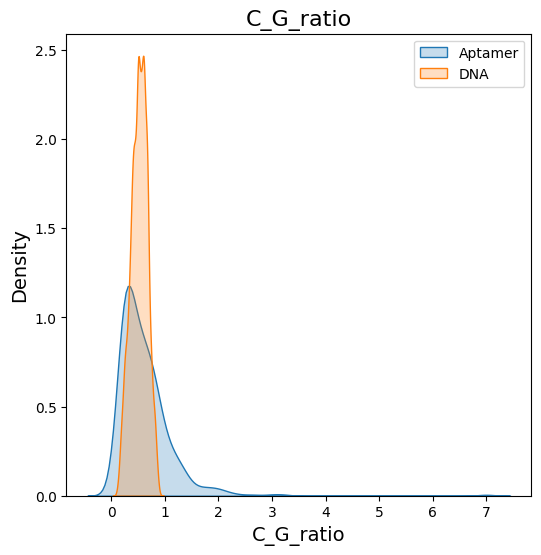

<ipython-input-68-43a5ccf1d61b>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dna_data, x=metric, fill=True, palette="plasma", label="Aptamer")
<ipython-input-68-43a5ccf1d61b>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=metric, fill=True, palette="plasma", label="DNA")


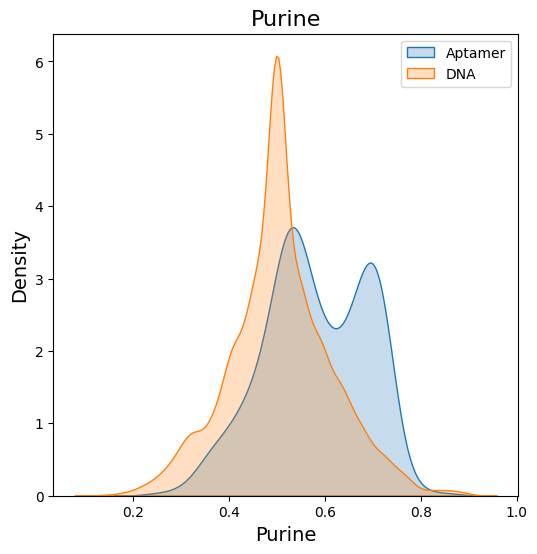

<ipython-input-68-43a5ccf1d61b>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dna_data, x=metric, fill=True, palette="plasma", label="Aptamer")
<ipython-input-68-43a5ccf1d61b>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=metric, fill=True, palette="plasma", label="DNA")


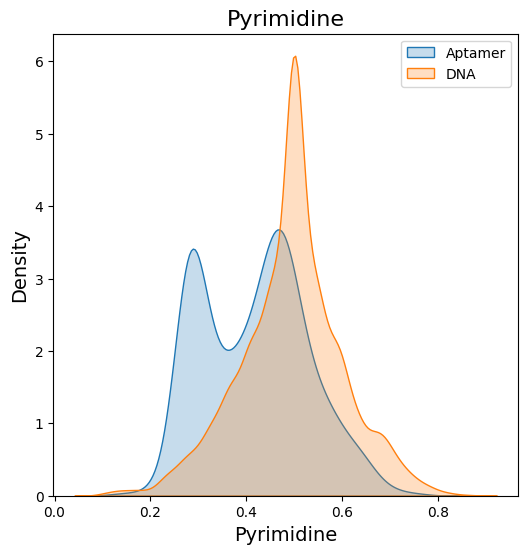

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем отдельные графики для каждой метрики
metrics = ["A_T_ratio", "C_G_ratio", 'Purine', 'Pyrimidine']
for metric in metrics:
    plt.figure(figsize=(6, 6))

    # График плотности для ДНК
    sns.kdeplot(data=dna_data, x=metric, fill=True, palette="plasma", label="Aptamer")

    # График плотности для общих данных
    sns.kdeplot(data=df, x=metric, fill=True, palette="plasma", label="DNA")

    # Настройки подписей и заголовка
    plt.title(f'{metric}', fontsize=16)
    plt.xlabel(metric, fontsize=14)
    plt.ylabel('Density', fontsize=14)  # Updated ylabel

    # Добавляем легенду
    plt.legend()

    # Отображаем график
    plt.show()

Графики плотности показывают взаимосвязь (или ее отсутствие) между характеристиками двух типов нуклеотидов. Эти дополнительные графики предполагают, что одного признака/переменной недостаточно для различения аптамеров ДНК и последовательностей ДНК без использования более сложной модели

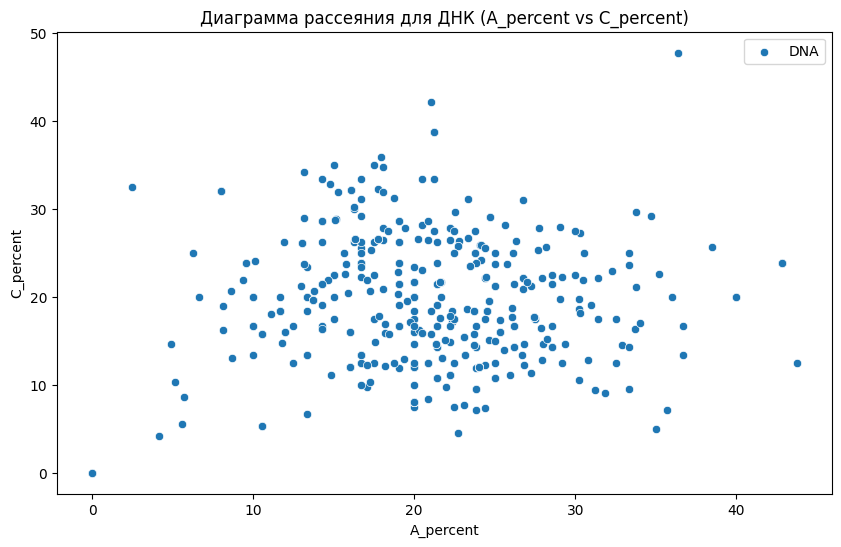

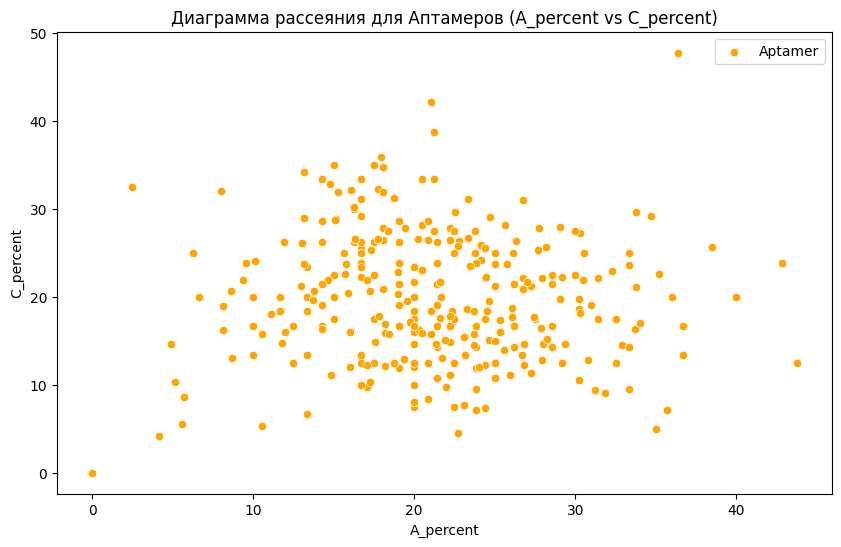

In [69]:
x_variable = "A_percent"
y_variable = "C_percent"

# Диаграмма рассеяния для ДНК
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dna_data, x=x_variable, y=y_variable, label="DNA")
plt.title(f"Диаграмма рассеяния для ДНК ({x_variable} vs {y_variable})")
plt.xlabel(x_variable)
plt.ylabel(y_variable)

# Диаграмма рассеяния для аптамеров
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dna_data, x=x_variable, y=y_variable, label="Aptamer", color='orange')
plt.title(f"Диаграмма рассеяния для Аптамеров ({x_variable} vs {y_variable})")
plt.xlabel(x_variable)
plt.ylabel(y_variable)

plt.show()

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
sequences = df['Seq'].tolist()

# Создаем объект CountVectorizer с k=6
vectorizer = CountVectorizer(analyzer='char', ngram_range=(6, 6))


X = vectorizer.fit_transform(sequences)

feature_names = vectorizer.get_feature_names_out()

sum_counts = X.sum(axis=0).A1

kmer_counts_df = pd.DataFrame({'kmer_sequence': feature_names, 'frequency': sum_counts})


top_kmers = kmer_counts_df.sort_values(by='frequency', ascending=False).head(10)
print(top_kmers)

     kmer_sequence  frequency
2063        gaattc         89
1515        cgaatt         85
240         aattcg         77
60          aaattt         75
816         atcagc         69
4009        tttttt         67
3859        ttcgcg         67
842         atcgat         64
1594        cgcgaa         64
1694        cgtacg         62


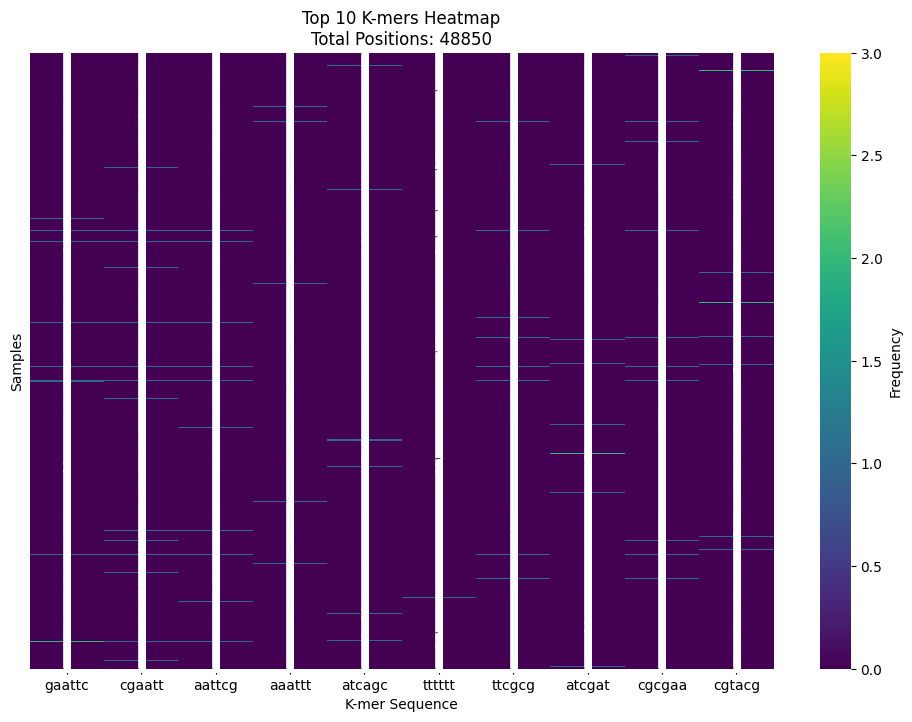

In [78]:
X = vectorizer.transform(sequences)

# Получаем частоты для каждого k-мера
kmer_frequencies = X.sum(axis=0).A1

# Создаем DataFrame с именами фичей и их частотами
kmer_counts_df = pd.DataFrame({'kmer_sequence': feature_names, 'frequency': kmer_frequencies})

# Выбираем 10 наиболее часто встречаемых k-меров
top_kmer = kmer_counts_df.sort_values(by='frequency', ascending=False).head(10)

# Создаем матрицу для тепловой карты
heatmap_data = X[:, top_kmer.index].toarray()
total_positions_1 = heatmap_data.size

# Увеличиваем размер графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="d", xticklabels=top_kmer['kmer_sequence'], yticklabels=False, cbar_kws={'label': 'Frequency'})

# Добавляем заголовок и подписи осей
plt.title(f'Top 10 K-mers Heatmap\nTotal Positions: {total_positions_1}')
plt.xlabel('K-mer Sequence')
plt.ylabel('Samples')

# Отображаем график
plt.show()

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
sequences_1 = ap_df['aptamer_sequence'].tolist()


vectorizer = CountVectorizer(analyzer='char', ngram_range=(6, 6))

# Преобразовываем последовательности в числовые вектора
X = vectorizer.fit_transform(sequences_1)

# Получаем имена фичей (k-меры)
feature_names = vectorizer.get_feature_names_out()

# Суммируем частоты по всем последовательностям
sum_counts_ap = X.sum(axis=0).A1

# Создаем DataFrame с именами фичей и их частотами
kmer_counts_df_ap = pd.DataFrame({'kmer_sequence': feature_names, 'frequency': sum_counts_ap})

# Сортируем по убыванию частоты и выбираем 10 наиболее часто встречаемых k-меров
top_kmer_ap = kmer_counts_df_ap.sort_values(by='frequency', ascending=False).head(10)

# Выводим результат
print(top_kmer_ap)

     kmer_sequence  frequency
3696        ggagga        181
3892        ggggga        146
5108        tggggg        137
3883        ggggag        128
3100        gaggaa        113
4125        gtattg        111
4693        tattgc        108
950         agtatt        107
2296        cggagg        107
3474        gcggag        106


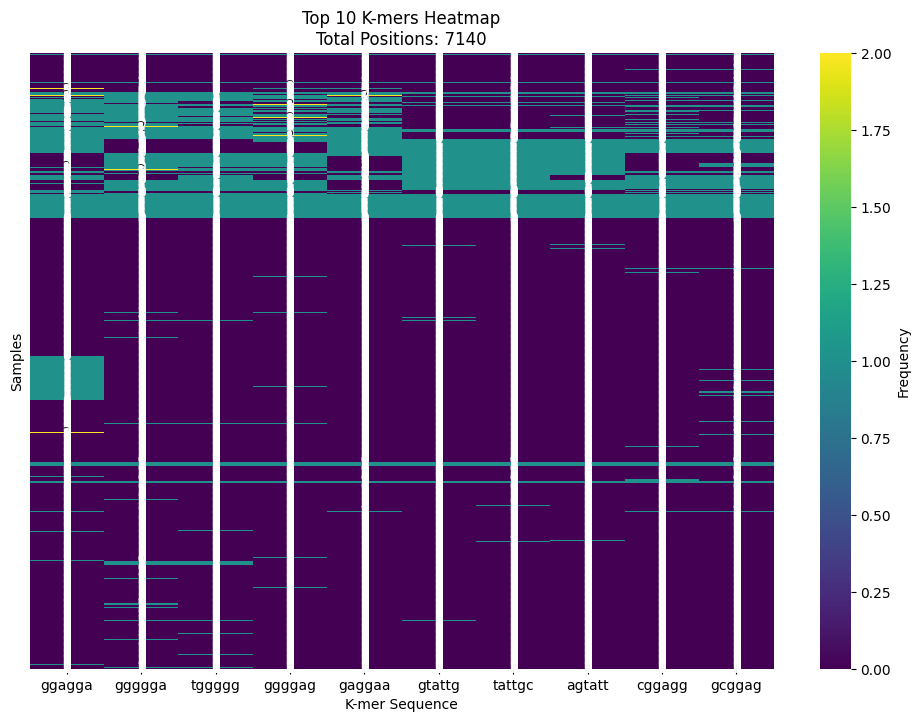

In [80]:
X = vectorizer.transform(sequences_1)

# Получаем частоты для каждого k-мера
kmer_frequencies = X.sum(axis=0).A1

# Создаем DataFrame с именами фичей и их частотами
kmer_counts_df_ap = pd.DataFrame({'kmer_sequence': feature_names, 'frequency': kmer_frequencies})

# Выбираем 10 наиболее часто встречаемых k-меров
top_kmer_ap = kmer_counts_df_ap.sort_values(by='frequency', ascending=False).head(10)

# Создаем матрицу для тепловой карты
heatmap_data = X[:, top_kmer_ap.index].toarray()
total_positions = heatmap_data.size

# Увеличиваем размер графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="d", xticklabels=top_kmer_ap['kmer_sequence'], yticklabels=False, cbar_kws={'label': 'Frequency'})

# Добавляем заголовок и подписи осей
plt.title(f'Top 10 K-mers Heatmap\nTotal Positions: {total_positions}')
plt.xlabel('K-mer Sequence')
plt.ylabel('Samples')

# Отображаем график
plt.show()

Sequence Lengths: [20, 20, 25, 24, 58, 54, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 49, 38, 32, 32, 66, 61, 44, 57, 80, 57, 55, 55, 55, 55, 55, 55, 55, 55, 27, 76, 38, 36, 84, 21, 39, 98, 90, 90, 90, 28, 28, 42, 42, 41, 42, 42, 42, 42, 42, 42, 43, 42, 41, 41, 42, 41, 42, 42, 40, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 42, 42, 42, 42, 44, 43, 44, 42, 25, 22, 24, 28, 23, 23, 24, 25, 25, 27, 27, 28, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 27, 25, 25, 25, 24, 25, 25, 25, 25, 25, 24, 24, 24, 25, 25, 25, 25, 29, 32, 15, 14, 20, 21, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 79, 79, 80, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 40, 42, 40, 40, 40, 40, 40, 40, 40, 39, 40, 40, 40, 71, 33, 71, 61, 90, 54, 44, 96, 24, 18, 75, 75, 75, 75, 75, 75, 25, 25, 2

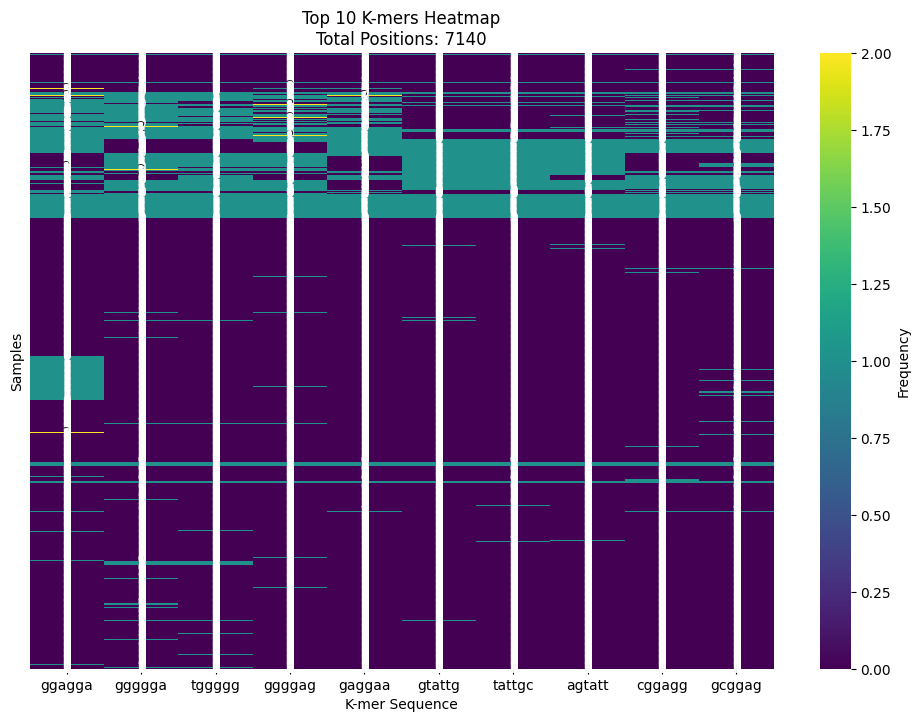

In [ ]:
print("Sequence Lengths:", [len(seq) for seq in sequences_1])

# Создаем матрицу для тепловой карты
heatmap_data = X[:, top_kmer_ap.index].toarray()
total_positions = heatmap_data.size

# Увеличиваем размер графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="d", xticklabels=top_kmer_ap['kmer_sequence'], yticklabels=False, cbar_kws={'label': 'Frequency'})

# Добавляем заголовок и подписи осей
plt.title(f'Top 10 K-mers Heatmap\nTotal Positions: {total_positions}')
plt.xlabel('K-mer Sequence')
plt.ylabel('Samples')

# Отображаем график
plt.show()

на данных картах наглядно показана встречаемость, данных показателей в датасете,
тепловая карта показывает распределение 6 меров в нашем наборе данных, цвет отражает частоту появления к мера в той или иной ячейке. соответственно из данных графиков мы видим, что для аптамеров характерно значительно большее число определённых k-mer и при этом довольно редки случаи когда один и тот же 6-мер дублируется, на тепловой карте для ДНК


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
sequences = df['Seq'].tolist()

# Создаем объект CountVectorizer с k=4
vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))

# Преобразовываем последовательности в числовые вектора
X = vectorizer.fit_transform(sequences)

# Получаем имена фичей (k-меры)
feature_names = vectorizer.get_feature_names_out()

# Суммируем частоты по всем последовательностям
sum_counts = X.sum(axis=0).A1

# Создаем DataFrame с именами фичей и их частотами
kmer_counts_df = pd.DataFrame({'kmer_sequence': feature_names, 'frequency': sum_counts})

# Сортируем по убыванию частоты и выбираем 10 наиболее часто встречаемых k-меров
top_kmers = kmer_counts_df.sort_values(by='frequency', ascending=False).head(10)

# Выводим результат
print(top_kmers)

    kmer_sequence  frequency
15           aatt        527
0            aaaa        428
256          tttt        423
205          tata        414
178          gtac        381
3            aaat        380
154          gcgc        375
78           catg        370
181          gtca        363
102          cgcg        352


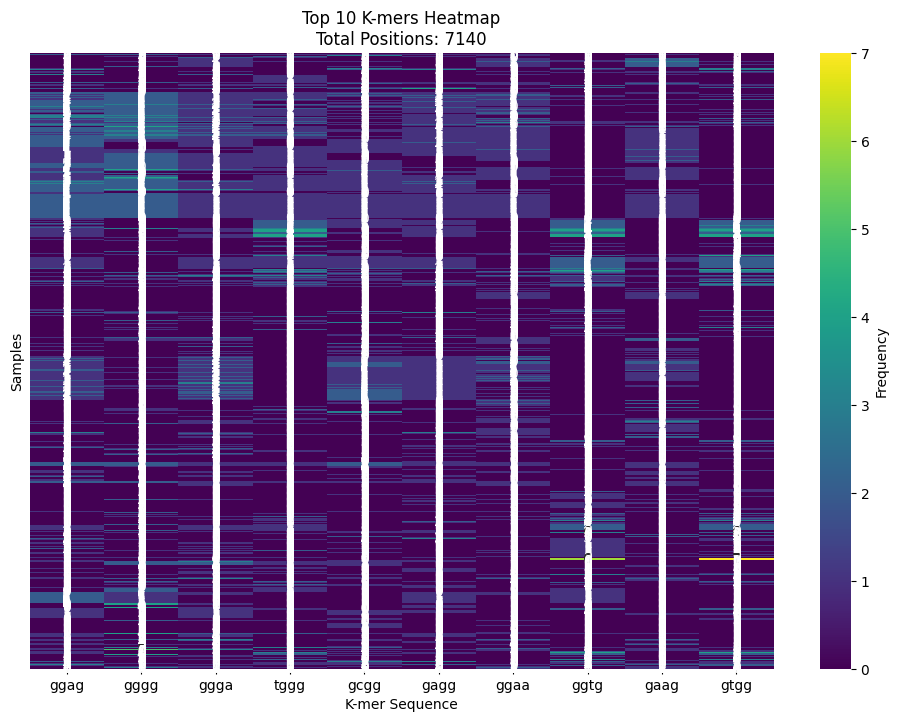

In [82]:
X = vectorizer.transform(sequences_1)

# Получаем частоты для каждого k-мера
kmer_frequencies = X.sum(axis=0).A1

# Создаем DataFrame с именами фичей и их частотами
kmer_counts_df_ap = pd.DataFrame({'kmer_sequence': feature_names, 'frequency': kmer_frequencies})

# Выбираем 10 наиболее часто встречаемых k-меров
top_kmer_ap = kmer_counts_df_ap.sort_values(by='frequency', ascending=False).head(10)

# Создаем матрицу для тепловой карты
heatmap_data = X[:, top_kmer_ap.index].toarray()
total_positions = heatmap_data.size

# Увеличиваем размер графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="d", xticklabels=top_kmer_ap['kmer_sequence'], yticklabels=False, cbar_kws={'label': 'Frequency'})

# Добавляем заголовок и подписи осей
plt.title(f'Top 10 K-mers Heatmap\nTotal Positions: {total_positions}')
plt.xlabel('K-mer Sequence')
plt.ylabel('Samples')

# Отображаем график
plt.show()

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
sequences = df['Seq'].tolist()

# Создаем объект CountVectorizer с k=4
vectorizer = CountVectorizer(analyzer='char', ngram_range=(4, 4))

# Преобразовываем последовательности в числовые вектора
X = vectorizer.fit_transform(sequences)

# Получаем имена фичей (k-меры)
feature_names = vectorizer.get_feature_names_out()

# Суммируем частоты по всем последовательностям
sum_counts = X.sum(axis=0).A1

# Создаем DataFrame с именами фичей и их частотами
kmer_counts_df = pd.DataFrame({'kmer_sequence': feature_names, 'frequency': sum_counts})

# Сортируем по убыванию частоты и выбираем 10 наиболее часто встречаемых k-меров
top_kmers = kmer_counts_df.sort_values(by='frequency', ascending=False).head(10)

# Выводим результат
print(top_kmers)

    kmer_sequence  frequency
15           aatt        527
0            aaaa        428
256          tttt        423
205          tata        414
178          gtac        381
3            aaat        380
154          gcgc        375
78           catg        370
181          gtca        363
102          cgcg        352


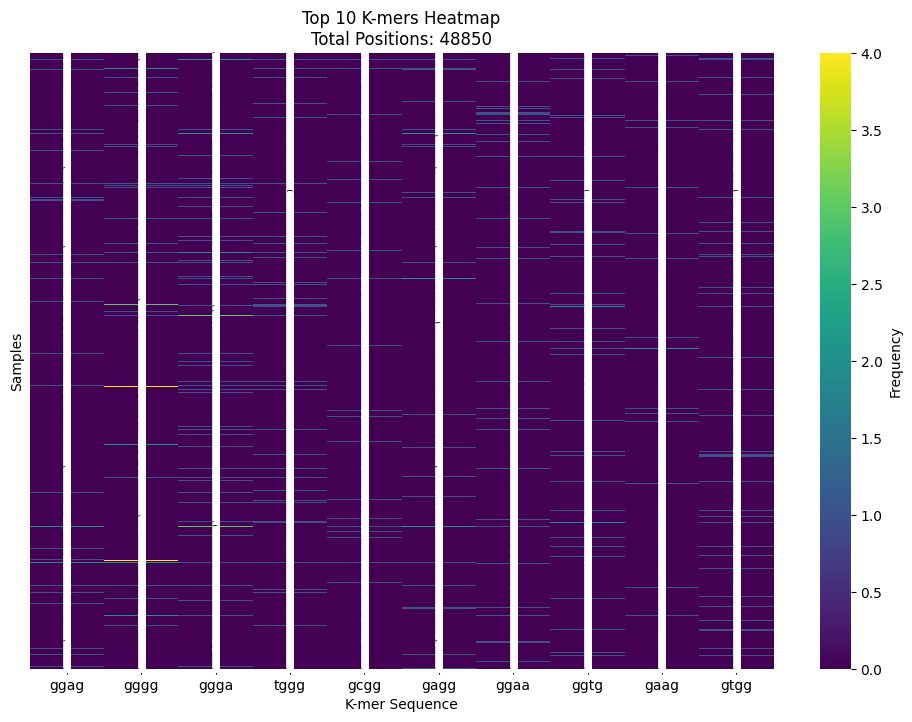

In [84]:



X = vectorizer.transform(sequences)

# Получаем частоты для каждого k-мера
kmer_frequencies = X.sum(axis=0).A1

# Создаем DataFrame с именами фичей и их частотами
kmer_counts_df = pd.DataFrame({'kmer_sequence': feature_names, 'frequency': kmer_frequencies})

# Выбираем 10 наиболее часто встречаемых k-меров
top_kmer = kmer_counts_df.sort_values(by='frequency', ascending=False).head(10)

# Создаем матрицу для тепловой карты
heatmap_data = X[:, top_kmer_ap.index].toarray()
total_positions_1 = heatmap_data.size

# Увеличиваем размер графика
plt.figure(figsize=(12, 8))

# Строим тепловую карту
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="d", xticklabels=top_kmer_ap['kmer_sequence'], yticklabels=False, cbar_kws={'label': 'Frequency'})

# Добавляем заголовок и подписи осей
plt.title(f'Top 10 K-mers Heatmap\nTotal Positions: {total_positions_1}')
plt.xlabel('K-mer Sequence')
plt.ylabel('Samples')

# Отображаем график
plt.show()

визуализация для 4 меров, что бы наглядно увидеть разницу встречаемости, это можно использоват для дальнейшего обучения модели для увеличения точности генерации аптамеров и их предсказания